<a href="https://colab.research.google.com/github/KarmanyaGupta1421/Compfinance/blob/main/comp_finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [107]:
# data = [['tom', 10], ['nick', 15], ['juli', 14]]
# # Create the pandas DataFrame
# df = pd.DataFrame(data, columns=['Name', 'Age'])
# # print dataframe.
# print(df)

# data2 = [['a', 1], ['b', 5], ['c', 4]]
# # Create the pandas DataFrame
# df2 = pd.DataFrame(data2, columns=['Name', 'Age'])
# # print dataframe.
# print(df2)

# df3 = pd.concat([df, df2])
# print(df3)

# frames = [df, df2]

# result = pd.concat(frames)
# print(result)

In [114]:
api_key = 'WENRL1PGGMYMW8BV'
symbol = 'RS'
interval = '1min'
year = '2023'
month = '01'

In [115]:
# url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={interval}&month={year}-{month}&outputsize=full&apikey={api_key}&datatype=json'
# # print(url)

# response = requests.get(url)
# data = response.json()

# with open ('data.json', 'w') as f:
#   json.dump(data, f)
# # print(data)
# time_series = data[f"Time Series (1min)"]

In [116]:
# time_series = None
# with open('data.json', 'r') as f:
#   time_series = json.load(f)
#   time_series = time_series[f"Time Series (1min)"]

In [117]:
# df = pd.DataFrame.from_dict(time_series, orient="index")
# df.columns = ["Open", "High", "Low", "Close", "Volume"]
# df.index = pd.to_datetime(df.index)
# df = df.astype(float)
# print(df.head())

                        Open     High      Low    Close   Volume
2023-01-31 16:05:00  223.228  223.257  223.168  223.211   2720.0
2023-01-31 16:04:00  223.228  223.257  223.168  223.211    481.0
2023-01-31 16:01:00  223.228  223.257  223.168  223.211    451.0
2023-01-31 16:00:00  223.228  223.257  223.168  223.211  94458.0
2023-01-31 15:59:00  223.317  223.424  223.021  223.368   8075.0


In [120]:
# a = 'data-' + year+ '-' + month
# print(a)

data-2023-01


In [132]:
df = pd.DataFrame()

for month in range(1,13):
  mnth = str(month)
  if month < 10:
    mnth = '0' + mnth

  file_name = 'data-' + year + '-'+ mnth + '.json'

  url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={interval}&month={year}-{mnth}&outputsize=full&apikey={api_key}&datatype=json'

  response = requests.get(url)
  data = response.json()
  time_series = data[f"Time Series ({interval})"]

  with open(file_name, 'w') as f:
    json.dump(data, f)

  df_temp = pd.DataFrame.from_dict(time_series, orient="index")
  df_temp.columns = ["Open", "High", "Low", "Close", "Volume"]
  df_temp.index = pd.to_datetime(df_temp.index)
  df_temp = df_temp.astype(float)

  df = pd.concat([df, df_temp])

  print(f'done with month {month}')

done with month 8
done with month 9
done with month 10
done with month 11
done with month 12


In [204]:
df = pd.DataFrame()

for month in range(12,13):
  mnth = str(month)
  if month < 10:
    mnth = '0' + mnth

  file_name = 'data-' + year + '-'+ mnth + '.json'
  # print(file_name)
  with open(file_name, 'r') as f:
    time_series = json.load(f)
    time_series = time_series[f"Time Series (1min)"]

    # print(time_series)

    df_temp = pd.DataFrame.from_dict(time_series, orient="index")

    df_temp.columns = ["Open", "High", "Low", "Close", "Volume"]
    df_temp.index = pd.to_datetime(df_temp.index)
    # print(df_temp)
    df_temp = df_temp.astype(float)

    # print(df_temp.head())

    df = pd.concat([df, df_temp])

In [205]:
print(df)

                        Open     High      Low    Close   Volume
2023-12-29 19:00:00  278.732  278.737  278.720  278.728  75504.0
2023-12-29 18:30:00  278.732  278.737  278.720  278.728  75504.0
2023-12-29 17:44:00  279.310  279.315  279.298  279.306     10.0
2023-12-29 16:25:00  279.051  279.703  279.039  279.694      7.0
2023-12-29 16:10:00  278.732  278.737  278.720  278.728  78854.0
...                      ...      ...      ...      ...      ...
2023-12-01 09:36:00  275.284  275.288  275.272  275.280    185.0
2023-12-01 09:34:00  274.656  276.405  274.644  275.788    975.0
2023-12-01 09:30:00  275.463  275.856  274.789  274.796   4691.0
2023-12-01 09:29:00  275.388  275.393  275.377  275.384      4.0
2023-12-01 08:00:00  274.327  274.332  274.316  274.323      1.0

[3288 rows x 5 columns]


In [206]:
df.to_csv('full_data.csv', sep=',', index=True)

In [207]:
close = df['Close']

# Moving Averages

In [208]:
def SMA(data, ndays):
    SMA = pd.Series(data['Close'].rolling(ndays).mean(), name = 'SMA')
    data = data.join(SMA)
    return data

def EWMA(data, ndays):
  EMA = pd.Series(data['Close'].ewm(span = ndays, min_periods = ndays - 1).mean(),
                name = 'EWMA_' + str(ndays))
  data = data.join(EMA)
  return data

In [212]:
n = 50
sma = SMA(df,n)
sma = sma.dropna()
sma = sma['SMA']


ew = 200
ewma = EWMA(df,ew)
ewma = ewma.dropna()
ewma = ewma['EWMA_200']

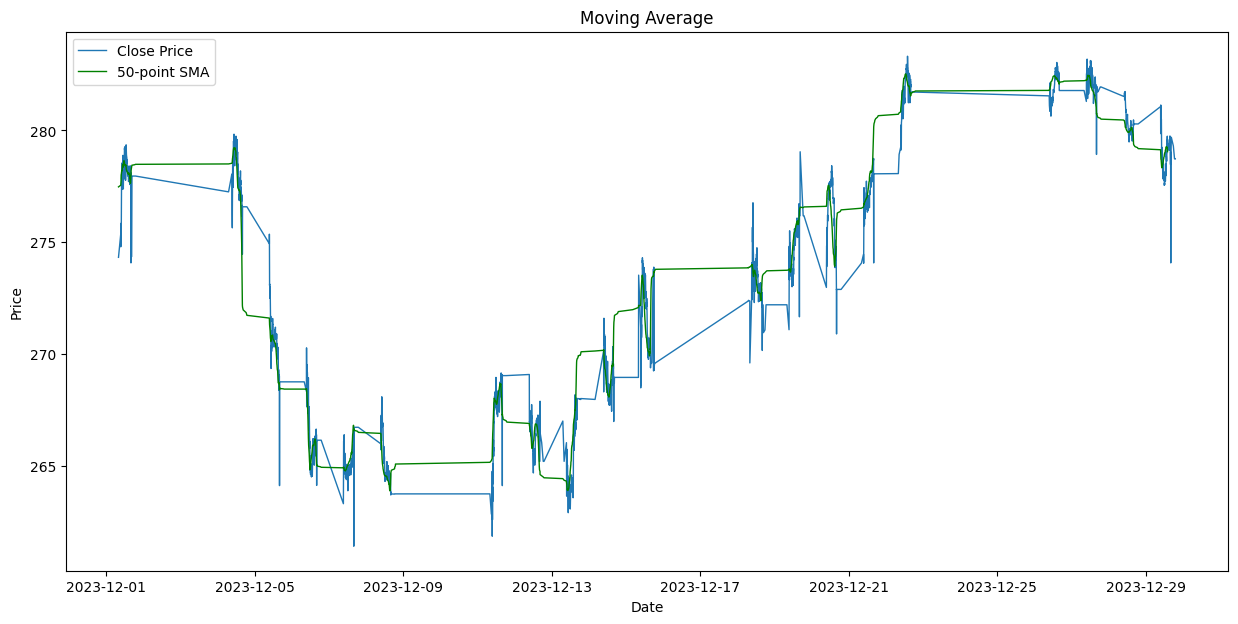

In [214]:
plt.figure(figsize=(15,7))
# Set the title and axis labels
plt.title('Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')

plt.plot(df['Close'],lw=1, label='Close Price')
plt.plot(sma,'g',lw=1, label='50-point SMA')
# plt.plot(ewma,'r', lw=1, label='200-point EMA')

plt.legend()

plt.show()

# Money Flow Index

The Money Flow Index (MFI) is a technical oscillator that uses price and volume data for identifying overbought or oversold signals in an asset. It can also be used to spot divergences which warn of a trend change in price. The oscillator moves between 0 and 100.

Unlike conventional oscillators such as the Relative Strength Index (RSI), the Money Flow Index incorporates both price and volume data, as opposed to just price.

In [215]:
def gain(x):
    return ((x > 0) * x).sum()


def loss(x):
    return ((x < 0) * x).sum()


# Calculate money flow index
def MFI(high, low, close, volume, n=14):
    typical_price = (high + low + close) / 3
    money_flow = typical_price * volume
    mf_sign = np.where(typical_price > typical_price.shift(1), 1, -1)
    signed_mf = money_flow * mf_sign

    # Calculate gain and loss using vectorized operations
    positive_mf = np.where(signed_mf > 0, signed_mf, 0)
    negative_mf = np.where(signed_mf < 0, -signed_mf, 0)

    mf_avg_gain = pd.Series(positive_mf).rolling(n, min_periods=1).sum()
    mf_avg_loss = pd.Series(negative_mf).rolling(n, min_periods=1).sum()

    return (100 - 100 / (1 + mf_avg_gain / mf_avg_loss)).to_numpy()

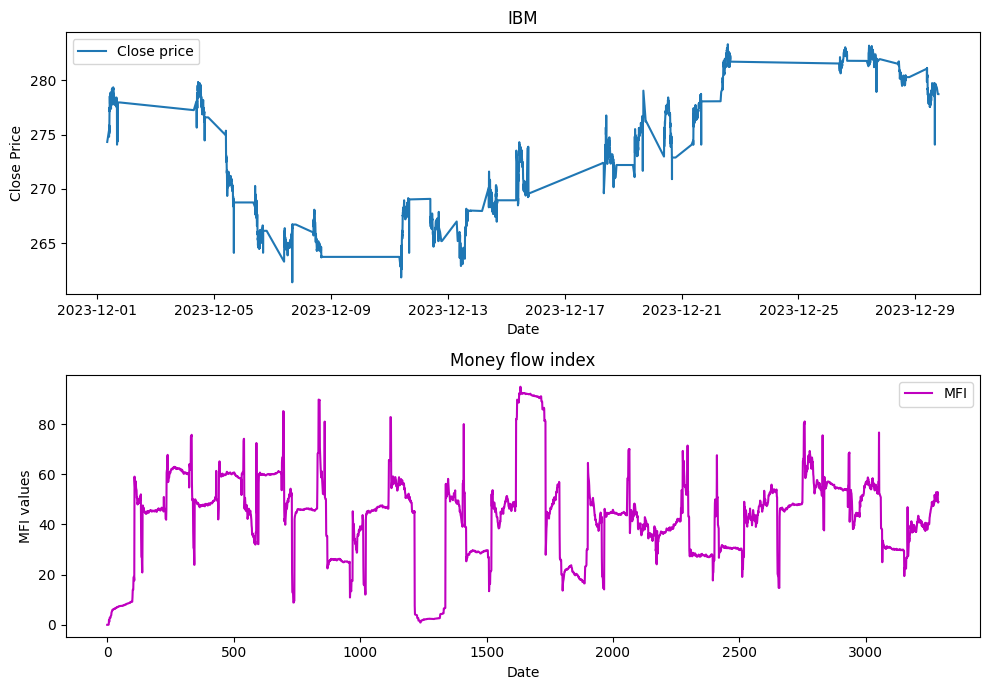

In [217]:
mfi = MFI(df['High'], df['Low'], df['Close'], df['Volume'], 100)

fig = plt.figure(figsize=(10, 7))

# Define position of 1st subplot
ax = fig.add_subplot(2, 1, 1)

# Set the title and axis labels
plt.title('IBM')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.plot(df['Close'], label='Close price')

# Add a legend to the axis
plt.legend()

# Define position of 2nd subplot
bx = fig.add_subplot(2, 1, 2)

# Set the title and axis labels
plt.title('Money flow index')
plt.xlabel('Date')
plt.ylabel('MFI values')

plt.plot(mfi, 'm', label='MFI')

# Add a legend to the axis
plt.legend()

plt.tight_layout()
plt.show()